In [1]:
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt 
import seaborn as sns
from sklearn. linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from sklearn. model_selection import train_test_split, cross_val_score
from sklearn. metrics import accuracy_score
from sklearn. model_selection import GridSearchCV 
from sklearn. linear_model import LogisticRegression
from sklearn. neighbors import KNeighborsClassifier 
from sklearn. svm import SVC
from sklearn. naive_bayes import GaussianNB
from sklearn. tree import DecisionTreeClassifier 
from sklearn. ensemble import RandomForestClassifier
import warnings 
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 初始数据探索与可视化

In [3]:
#检查缺失数据
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

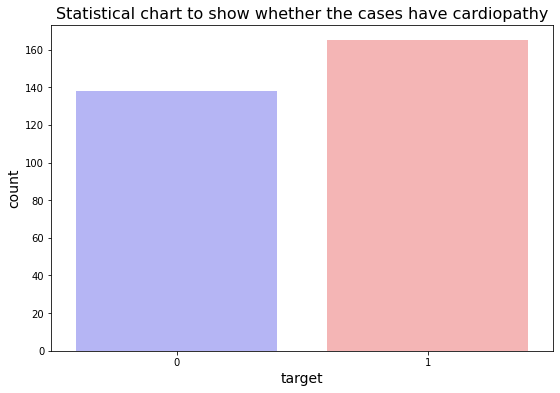

患有心脏病占比45.54%，而不患心脏病的占比54.46%


In [4]:
#患病比例分析
plt.rcParams["figure.figsize"]=(9,6)
sns.countplot(x="target",data=df,palette="bwr")
plt.xlabel("target",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.title("Statistical chart to show whether the cases have cardiopathy",fontsize=16)
plt.show()

countNodis =len(df[df.target==0])
countDis =len(df[df.target==1])
tot = countNodis+countDis
print("患有心脏病占比{:.2f}%，而不患心脏病的占比{:.2f}%".format(countNodis*100/tot,countDis*100/tot))

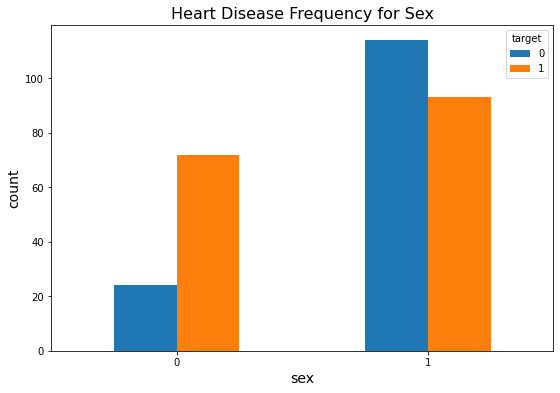

In [5]:
#不同性别的心脏病发病率
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(9,6))
plt.xticks(rotation=360)
plt.xlabel("sex",fontsize=14)
plt.ylabel("count",fontsize=14)
plt.title("Heart Disease Frequency for Sex",fontsize=16)
plt.show()

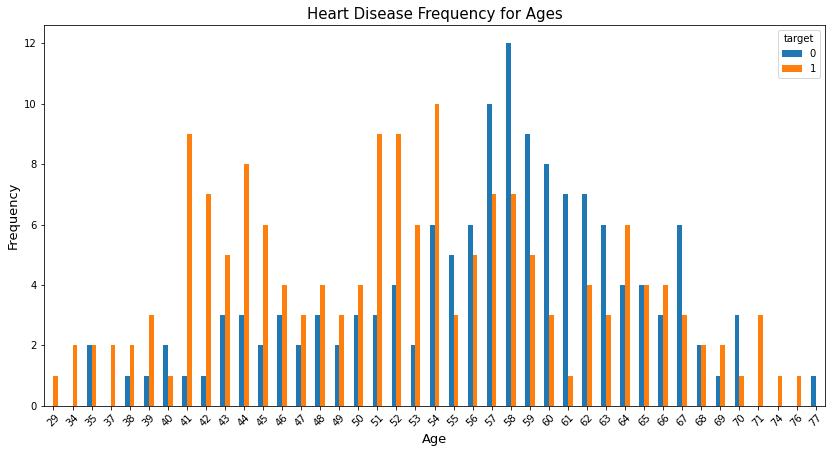

In [6]:
#不同年龄段的心脏病发病率
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(14,7))
plt.xticks(rotation=45)
plt.title("Heart Disease Frequency for Ages",fontsize=15)
plt.xlabel("Age",fontsize=13)
plt.ylabel("Frequency",fontsize=13)
plt.savefig('./freq_ages.png')

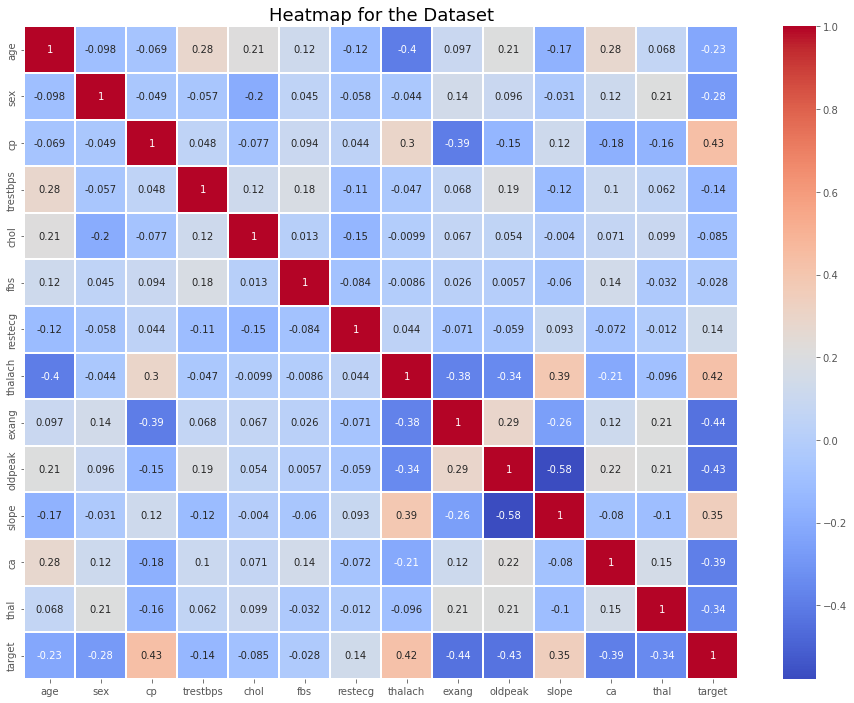

In [7]:
# 热力图进行相关性分析
plt.rcParams['figure.figsize'] = (16, 12)
plt.style.use('ggplot')
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm",linewidth=.1) 
plt.title('Heatmap for the Dataset', fontsize = 18) 
plt.savefig('./heatmap.png')
#可以看出是否患病和cp, thalach, slope正相关,和exang, oldpeak, cathal等负相关。
#因此之后的模型构建只取三个特征cp, thalach, slope和目标值target进行分析

# 数据清洗、预处理
    数据集中age,trestbpd,chol,thalach,oldpeak均为数值类型数据,sex,fbs,exang,target均为二分类型数据,因此不需预处理；而剩下的cp,restecg,slope,ca,thal均为多分类型数值,需要进行数据预处理     

In [8]:
#拆分属性的值
a=pd.get_dummies(df['cp'], prefix = "cp")
b=pd.get_dummies(df['thal'], prefix = "thal")
c=pd.get_dummies(df['slope'], prefix = "slope")

In [9]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1) 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [10]:
df = df.drop(columns = ['cp', 'thal', 'slope']) 
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [11]:
y=df.target.values
x_data = df.drop(['target'], axis = 1)

In [12]:
# 标准化处理
sc = StandardScaler()
sc.fit(x_data)
x = sc.transform(x_data)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

In [14]:
#对矩阵进行转置处理 
x_train = x_train.T 
y_train = y_train.T 
x_test = x_test.T 
y_test = y_test.T

# LogisticRegression逻辑回归

In [15]:
accuracies = {}
#网格搜索最佳参数
grid_param=[{'penalty': ['l1', 'l2'],'C': [0.003, 0.01, 0.1, 1, 10,100,300]}]

grid_lr = GridSearchCV(LogisticRegression(), grid_param, cv=5)
grid_lr.fit(x_train.T,y_train.T) 
lr=grid_lr.best_estimator_
acc=lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc 
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


# K最邻近（KNN）分类模型

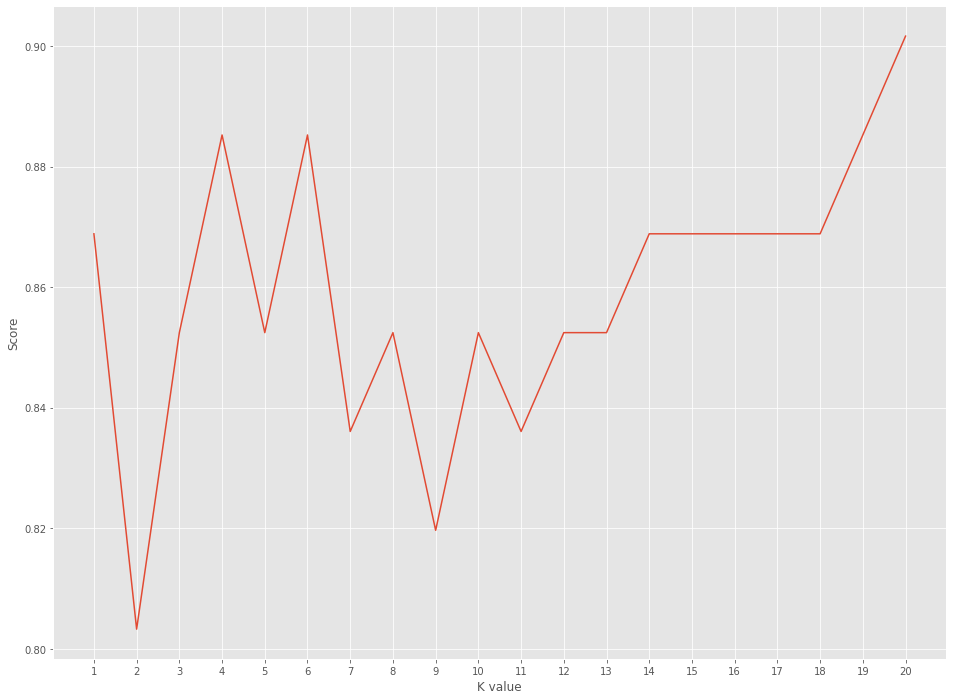

Maximum KNN Score is 90.16%


KNeighborsClassifier(n_neighbors=20)

In [16]:
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i) 
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot([i for i in range(1,21)], scoreList)
plt.xticks(np.arange(1, 21,1))
plt.xlabel("K value") 
plt.ylabel("Score")
plt.show()
max_k=0
acc=0
for i in range(20):
    if acc<scoreList[i]:
        acc=scoreList[i] 
        max_k=i+1
acc*=100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc)) 
knn_best=KNeighborsClassifier(n_neighbors=max_k) 
knn_best.fit(x_train.T, y_train.T)

# 支持向量机（SVM算法）

In [17]:
#网格搜索最佳参数
grid_param=[{"kernel":['linear', 'poly', 'rbf', 'sigmoid'],'C':[0.003, 0.01, 0.1, 1,10, 100,300]}]
grid_svm=GridSearchCV(SVC(random_state=1), grid_param,scoring="accuracy",cv=5)
grid_svm.fit(x_train.T,y_train.T)
svm=grid_svm.best_estimator_
svm.fit(x_train. T, y_train.T)

acc=svm.score(x_test. T, y_test.T)*100
accuracies['SVM'] = acc

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))


Test Accuracy of SVM Algorithm: 85.25%


# 朴素贝叶斯（Naive Bayes）

In [18]:
nb= GaussianNB()
nb.fit(x_train.T, y_train.T)
acc =nb.score(x_test.T, y_test.T)*100
accuracies ['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


# 决策树分类模型

In [19]:
from IPython. display import Image
import pydotplus
from sklearn import tree #网格搜索最佳参数
entropy_thresholds = np. linspace(0, 1, 100)
gini_thresholds = np. linspace(0, 0.2, 100)
#设置参数矩阵:
param_grid =[{'criterion': ['entropy'], 'min_impurity_decrease': entropy_thresholds},
             {'criterion': ['gini'],'min_impurity_decrease': gini_thresholds},
             {'max_depth': np.arange(2,10)},
             {'min_samples_split': np.arange(2,30,2)}]

clf = GridSearchCV(DecisionTreeClassifier(), param_grid,scoring="accuracy",cv=5)
clf.fit(x_train.T,y_train.T)
dtc=clf.best_estimator_
acc = dtc.score(x_test.T, y_test.T)*100 
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 85.25%


In [20]:
dot_data = tree.export_graphviz(dtc, out_file=None, class_names=['0','1'],filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 
#Image(graph.create_png())
graph.write_png(r"visualize Decision Tree.png")

True

# 随机森林分类

    对基于CART的随机森林的调参，主要有：
    1，树的个数
    2，树的最大深度
    3，内部节点最少样本数与叶节点最少样本数
    4，特征个数
    此外，因为本实验针对分类问题，因此调参过程中选择的评判标准是'roc_auc'，5倍折叠
        -AUC-ROC曲线是针对各种阈值设置下的分类问题的性能度量。ROC是概率曲线，AUC表示可分离的程度或测度，它告诉我们多少模型能够区分类别。

In [21]:
#网格搜索最佳参数
#首先对树的个数做调参
param_test1 = {'n_estimators': range(10, 201,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=50, min_samples_leaf=10, max_depth=8, max_features='auto'), 
                        param_grid =param_test1,scoring="roc_auc",cv=5)
gsearch1.fit(x_train.T,y_train.T) 
gsearch1.best_params_, gsearch1.best_score_
best_n_estimators = gsearch1.best_params_['n_estimators']


In [22]:
best_n_estimators

190

In [23]:
#其次，对树的最大深度做调参
param_test2= {'max_depth': range(1,21)}
gsearch2= GridSearchCV(estimator = RandomForestClassifier(n_estimators=best_n_estimators,min_samples_split=50, min_samples_leaf=10, max_features='auto',
                                         oob_score=True), param_grid = param_test2,scoring="roc_auc", cv=5)
gsearch2.fit(x_train.T,y_train.T) 
gsearch2.best_params_, gsearch2.best_score_
best_max_depth = gsearch2.best_params_['max_depth']


In [24]:
best_max_depth

6

In [25]:
#再对内部节点再划分所需最小样本数min_samples_split和叶子节点数min_sample_leaf
param_test3= {'min_samples_split': range(10, 121,10), "min_samples_leaf":range(5,51,5)} 
gsearch3= GridSearchCV(estimator = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, max_features='auto',
                                          oob_score=True), param_grid = param_test3, scoring="roc_auc",cv=5)
gsearch3.fit(x_train.T,y_train.T) 
gsearch3.best_params_, gsearch3.best_score_
best_min_samples_leaf = gsearch3.best_params_['min_samples_leaf']
best_min_samples_split = gsearch3.best_params_['min_samples_split']


In [26]:
print(best_min_samples_split,best_min_samples_leaf)

40 10


In [27]:
#最后再对最大特征数max_features做调参:
param_test4= {'max_features': ['auto', 'sqrt', 'log2',.01,20]}
#max_features=20， 每个结点分裂时，先随机选取20个特征，再从这20个特征中选择最优的
#max_features=0.1， 0.1*总的特征数
#max_features="auto"， sqrt(总的特征数)（随机森林的默认值）
#max_features="sqrt"， sqrt(总的特征数)，和"auto"一样
#max_features="log2"， log2(总的特征数)

gsearch4= GridSearchCV(estimator = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                                            min_samples_leaf=best_min_samples_leaf,
                                                            min_samples_split=best_min_samples_split, 
                                                            oob_score=True),param_grid = param_test4,scoring="roc_auc",cv=5)
gsearch4.fit(x_train.T,y_train.T) 
gsearch4.best_params_, gsearch4.best_score_
best_max_features = gsearch4.best_params_['max_features']

In [28]:
best_max_features

'sqrt'

In [35]:
rf_best= RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth,
                                min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split,
                                max_features=best_max_features, oob_score=True)

rf_best.fit(x_train.T,y_train.T)

rf_best.score(x_test.T,y_test.T)
acc = rf_best.score(x_test.T,y_test.T)*100
accuracies ['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score: 90.16%


# 卷积神经网络（CNN）模型

In [36]:
from keras import Sequential
from keras.layers import Flatten,Dense,Dropout,BatchNormalization
from keras.layers import Conv1D,MaxPool1D
from keras.optimizers import Adam

In [37]:
df=pd.read_csv("heart.csv")

In [38]:
X = df.drop(['target'], axis=1)  # 删除指定标签作为数据
Y = df['target']  # 指定标签数据
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=20,stratify=Y)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train) # 将numpy类型转换为DataFrame类型
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)


In [39]:
# 将dataframe类型转换为numpy类型
x_cnn_train = X_train.to_numpy()
x_cnn_test = X_test.to_numpy()
y_cnn_train = Y_train.to_numpy()
y_cnn_test = Y_test.to_numpy()
# 扩展维数，扩展为(X,X,1)
x_cnn_train=np.expand_dims(x_cnn_train, axis=2)
x_cnn_test=np.expand_dims(x_cnn_test,axis=2)

# 搭建模型
model = Sequential()

In [40]:
model.add(Conv1D(filters= 32, kernel_size= 2, activation = 'relu', input_shape = (13,1)))
model.add(BatchNormalization())
#model.add(MaxPool1D())  --- Pooling is bad for these kinds of data
model.add(Dropout(0.2))

model.add(Conv1D(filters= 64, kernel_size= 2 , activation= 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool1D(1,1))
model.add(Dropout(0.5))

model.add(Conv1D(filters=128, kernel_size= 2 , activation= 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool1D(1,1))
model.add(Dropout(0.5))

model.add(Conv1D(filters= 256, kernel_size= 2 , activation= 'relu'))
model.add(BatchNormalization())
#model.add(MaxPool1D(1,1))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))
model.summary()

model.compile(optimizer = Adam(lr = 0.00005), loss = 'binary_crossentropy', metrics =['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 32)            96        
                                                                 
 batch_normalization (BatchN  (None, 12, 32)           128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 12, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            4160      
                                                                 
 batch_normalization_1 (Batc  (None, 11, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 11, 64)            0

In [41]:
history =model.fit(x_cnn_train, y_cnn_train, epochs=300,validation_data=(x_cnn_test, y_cnn_test), verbose=2)
scores = model.evaluate(x_cnn_train, y_cnn_train, verbose=2)
print('The finnal %s of the model on the train dataset is: %.2f%%' % (model.metrics_names[1], scores[1] * 100))

Epoch 1/300
8/8 - 1s - loss: 1.1965 - accuracy: 0.5083 - val_loss: 0.6845 - val_accuracy: 0.4590 - 1s/epoch - 176ms/step
Epoch 2/300
8/8 - 0s - loss: 1.0964 - accuracy: 0.5331 - val_loss: 0.6801 - val_accuracy: 0.7541 - 112ms/epoch - 14ms/step
Epoch 3/300
8/8 - 0s - loss: 1.1610 - accuracy: 0.5620 - val_loss: 0.6765 - val_accuracy: 0.7049 - 105ms/epoch - 13ms/step
Epoch 4/300
8/8 - 0s - loss: 1.1533 - accuracy: 0.5579 - val_loss: 0.6719 - val_accuracy: 0.5738 - 107ms/epoch - 13ms/step
Epoch 5/300
8/8 - 0s - loss: 0.9252 - accuracy: 0.6074 - val_loss: 0.6694 - val_accuracy: 0.5410 - 102ms/epoch - 13ms/step
Epoch 6/300
8/8 - 0s - loss: 1.0680 - accuracy: 0.5992 - val_loss: 0.6708 - val_accuracy: 0.5410 - 105ms/epoch - 13ms/step
Epoch 7/300
8/8 - 0s - loss: 1.0557 - accuracy: 0.5868 - val_loss: 0.6746 - val_accuracy: 0.5410 - 104ms/epoch - 13ms/step
Epoch 8/300
8/8 - 0s - loss: 1.0371 - accuracy: 0.5372 - val_loss: 0.6799 - val_accuracy: 0.5410 - 102ms/epoch - 13ms/step
Epoch 9/300
8/8 - 

Epoch 68/300
8/8 - 0s - loss: 0.6399 - accuracy: 0.7066 - val_loss: 0.3309 - val_accuracy: 0.8197 - 97ms/epoch - 12ms/step
Epoch 69/300
8/8 - 0s - loss: 0.5237 - accuracy: 0.7686 - val_loss: 0.3303 - val_accuracy: 0.8197 - 101ms/epoch - 13ms/step
Epoch 70/300
8/8 - 0s - loss: 0.7302 - accuracy: 0.7397 - val_loss: 0.3317 - val_accuracy: 0.8197 - 114ms/epoch - 14ms/step
Epoch 71/300
8/8 - 0s - loss: 0.7782 - accuracy: 0.6860 - val_loss: 0.3330 - val_accuracy: 0.8197 - 116ms/epoch - 14ms/step
Epoch 72/300
8/8 - 0s - loss: 0.6002 - accuracy: 0.7851 - val_loss: 0.3356 - val_accuracy: 0.8197 - 104ms/epoch - 13ms/step
Epoch 73/300
8/8 - 0s - loss: 0.5548 - accuracy: 0.7603 - val_loss: 0.3365 - val_accuracy: 0.8197 - 113ms/epoch - 14ms/step
Epoch 74/300
8/8 - 0s - loss: 0.6072 - accuracy: 0.7521 - val_loss: 0.3389 - val_accuracy: 0.8197 - 97ms/epoch - 12ms/step
Epoch 75/300
8/8 - 0s - loss: 0.6782 - accuracy: 0.7149 - val_loss: 0.3410 - val_accuracy: 0.8197 - 105ms/epoch - 13ms/step
Epoch 76/3

8/8 - 0s - loss: 0.6047 - accuracy: 0.7521 - val_loss: 0.3475 - val_accuracy: 0.8197 - 105ms/epoch - 13ms/step
Epoch 135/300
8/8 - 0s - loss: 0.5625 - accuracy: 0.8264 - val_loss: 0.3494 - val_accuracy: 0.8197 - 110ms/epoch - 14ms/step
Epoch 136/300
8/8 - 0s - loss: 0.5567 - accuracy: 0.7686 - val_loss: 0.3497 - val_accuracy: 0.8033 - 105ms/epoch - 13ms/step
Epoch 137/300
8/8 - 0s - loss: 0.5648 - accuracy: 0.7934 - val_loss: 0.3499 - val_accuracy: 0.8033 - 99ms/epoch - 12ms/step
Epoch 138/300
8/8 - 0s - loss: 0.5606 - accuracy: 0.7810 - val_loss: 0.3481 - val_accuracy: 0.8197 - 91ms/epoch - 11ms/step
Epoch 139/300
8/8 - 0s - loss: 0.5723 - accuracy: 0.7810 - val_loss: 0.3463 - val_accuracy: 0.8197 - 95ms/epoch - 12ms/step
Epoch 140/300
8/8 - 0s - loss: 0.5851 - accuracy: 0.7645 - val_loss: 0.3465 - val_accuracy: 0.8361 - 93ms/epoch - 12ms/step
Epoch 141/300
8/8 - 0s - loss: 0.5921 - accuracy: 0.7397 - val_loss: 0.3465 - val_accuracy: 0.8361 - 102ms/epoch - 13ms/step
Epoch 142/300
8/8 

Epoch 200/300
8/8 - 0s - loss: 0.5680 - accuracy: 0.8017 - val_loss: 0.3840 - val_accuracy: 0.7869 - 110ms/epoch - 14ms/step
Epoch 201/300
8/8 - 0s - loss: 0.5106 - accuracy: 0.7686 - val_loss: 0.3842 - val_accuracy: 0.7869 - 116ms/epoch - 14ms/step
Epoch 202/300
8/8 - 0s - loss: 0.6004 - accuracy: 0.7686 - val_loss: 0.3830 - val_accuracy: 0.7869 - 115ms/epoch - 14ms/step
Epoch 203/300
8/8 - 0s - loss: 0.5116 - accuracy: 0.7769 - val_loss: 0.3823 - val_accuracy: 0.7869 - 108ms/epoch - 13ms/step
Epoch 204/300
8/8 - 0s - loss: 0.5209 - accuracy: 0.7934 - val_loss: 0.3844 - val_accuracy: 0.7705 - 103ms/epoch - 13ms/step
Epoch 205/300
8/8 - 0s - loss: 0.5029 - accuracy: 0.7975 - val_loss: 0.3870 - val_accuracy: 0.7869 - 116ms/epoch - 14ms/step
Epoch 206/300
8/8 - 0s - loss: 0.4375 - accuracy: 0.8182 - val_loss: 0.3891 - val_accuracy: 0.7705 - 112ms/epoch - 14ms/step
Epoch 207/300
8/8 - 0s - loss: 0.5830 - accuracy: 0.7769 - val_loss: 0.3906 - val_accuracy: 0.7705 - 86ms/epoch - 11ms/step
E

Epoch 266/300
8/8 - 0s - loss: 0.5453 - accuracy: 0.7810 - val_loss: 0.4166 - val_accuracy: 0.7705 - 93ms/epoch - 12ms/step
Epoch 267/300
8/8 - 0s - loss: 0.4820 - accuracy: 0.7934 - val_loss: 0.4154 - val_accuracy: 0.7705 - 101ms/epoch - 13ms/step
Epoch 268/300
8/8 - 0s - loss: 0.5376 - accuracy: 0.8017 - val_loss: 0.4139 - val_accuracy: 0.7705 - 96ms/epoch - 12ms/step
Epoch 269/300
8/8 - 0s - loss: 0.4577 - accuracy: 0.8140 - val_loss: 0.4138 - val_accuracy: 0.7705 - 96ms/epoch - 12ms/step
Epoch 270/300
8/8 - 0s - loss: 0.5712 - accuracy: 0.7934 - val_loss: 0.4155 - val_accuracy: 0.7541 - 100ms/epoch - 12ms/step
Epoch 271/300
8/8 - 0s - loss: 0.5505 - accuracy: 0.8099 - val_loss: 0.4163 - val_accuracy: 0.7541 - 95ms/epoch - 12ms/step
Epoch 272/300
8/8 - 0s - loss: 0.4292 - accuracy: 0.8471 - val_loss: 0.4169 - val_accuracy: 0.7541 - 95ms/epoch - 12ms/step
Epoch 273/300
8/8 - 0s - loss: 0.4519 - accuracy: 0.7975 - val_loss: 0.4171 - val_accuracy: 0.7541 - 101ms/epoch - 13ms/step
Epoch

In [42]:
index_of_best_valacc=history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('At No.%s Epoch of CNN model we achieve the highest val_accuracy equals to %.2f%%' % (index_of_best_valacc+1, max(history.history['val_accuracy'])*100))

At No.124 Epoch of CNN model we achieve the highest val_accuracy equals to 85.25%


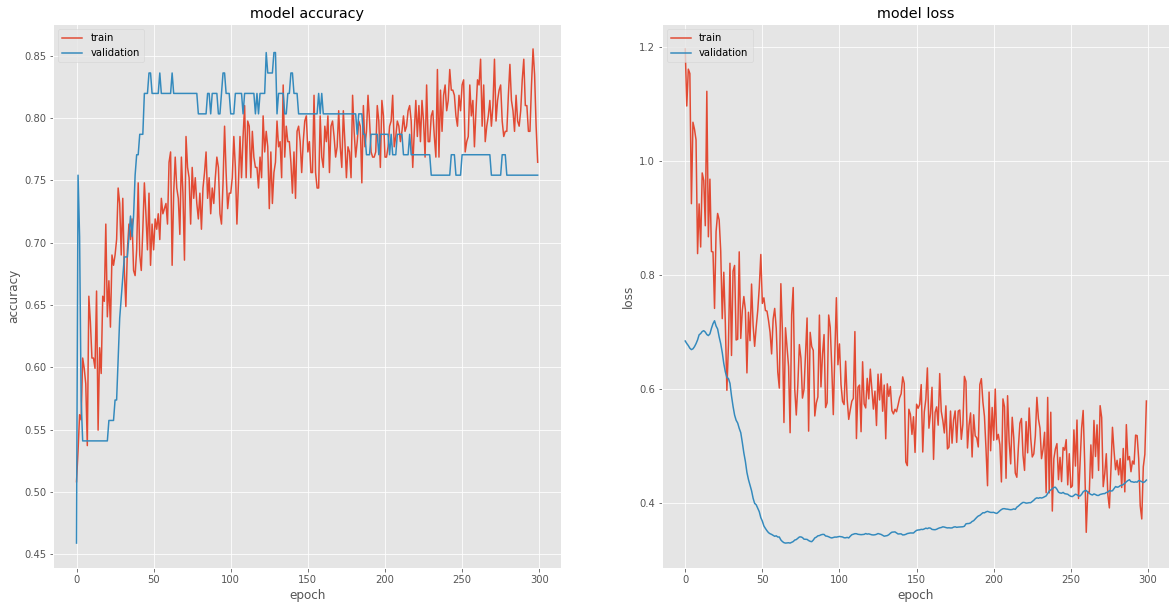

In [43]:
fig,  (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
# accuracy的历史
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('model accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
# loss的历史
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
plt.savefig('./output_CNN.png')

In [44]:
accuracies['CNN'] =  (max(history.history['val_accuracy']) )*100

# 模型比较

In [45]:
accuracies

{'Logistic Regression': 86.88524590163934,
 'KNN': 90.1639344262295,
 'SVM': 85.24590163934425,
 'Naive Bayes': 86.88524590163934,
 'Decision Tree': 85.24590163934425,
 'Random Forest': 90.1639344262295,
 'CNN': 85.24590134620667}

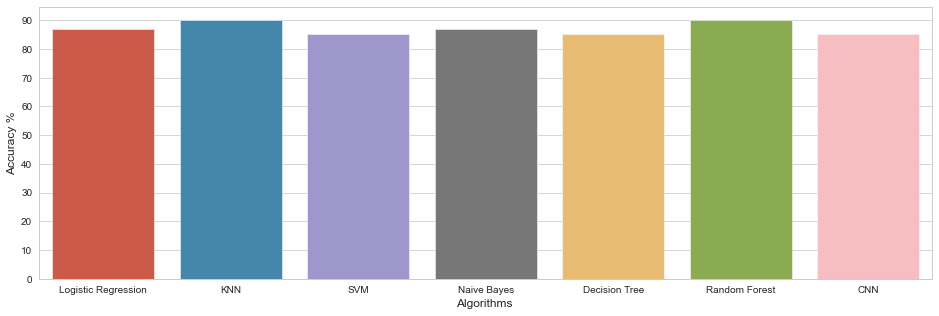

In [46]:
#以准确率accuracy为评价指标来比较以上所有模型表现
colors = ["purple", "pink", "orange", "magenta", "red","green","blue"]
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel( "Accuracy %") 
plt.xlabel("Algorithms ")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values())) 
plt.savefig('./acc_compare.png')

# 混淆矩阵

In [47]:
# Predicted values
y_head_lr = lr.predict(x_test.T)
y_head_knn = knn_best.predict(x_test.T)
y_head_svm =svm.predict(x_test.T) 
y_head_nb = nb.predict(x_test.T) 
y_head_dtc = dtc.predict(x_test.T) 
y_head_rf = rf_best.predict(x_test.T)



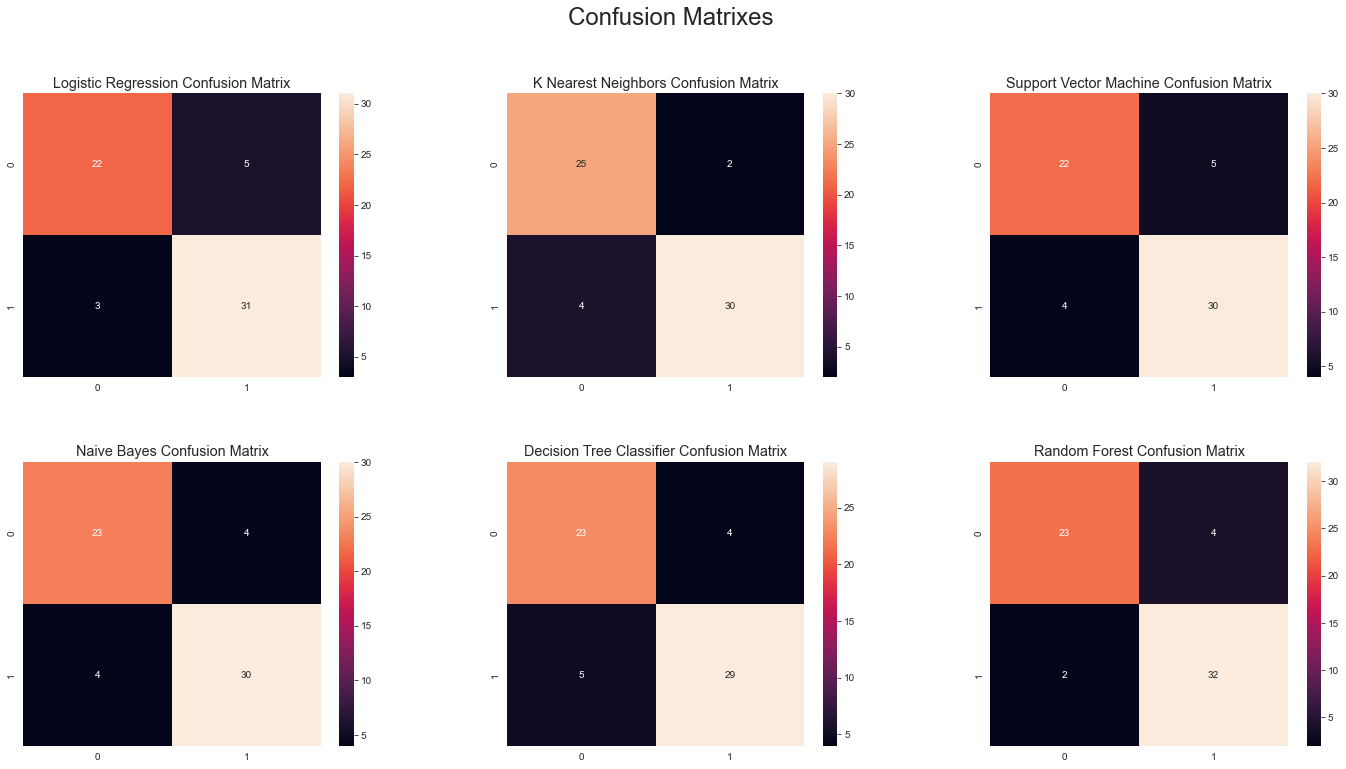

In [48]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr) 
cm_knn=confusion_matrix(y_test, y_head_knn)
cm_svm= confusion_matrix(y_test, y_head_svm)
cm_nb=confusion_matrix(y_test, y_head_nb) 
cm_dtc = confusion_matrix(y_test, y_head_dtc) 
cm_rf =confusion_matrix(y_test, y_head_rf)


plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24) 
plt.subplots_adjust(wspace = 0.3, hspace= 0.3)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr, annot=True, fmt="d" ,cbar=True, annot_kws=None)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn, annot=True, fmt="d", cbar=True, annot_kws=None)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm, annot=True, fmt="d" , cbar=True, annot_kws=None)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix") 
sns.heatmap(cm_nb, annot=True, fmt="d",cbar=True, annot_kws=None)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc, annot=True, fmt="d", cbar=True, annot_kws=None)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf, annot=True, fmt="d" , cbar=True, annot_kws=None)

plt.savefig('./confusion_matrix.png')

# 评价随机森林模型

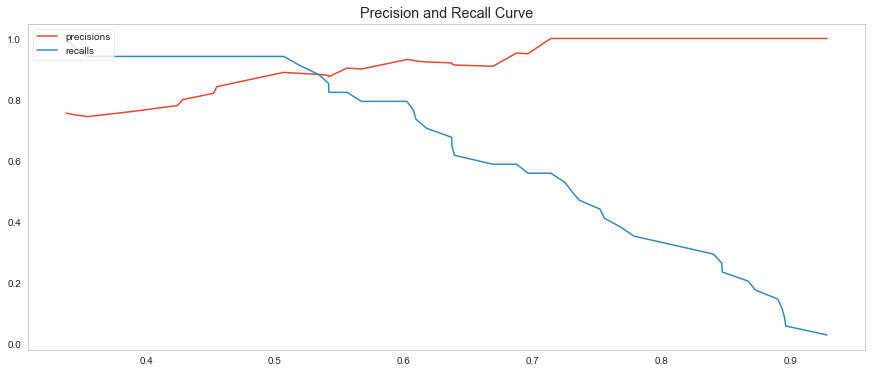

In [49]:
#绘制准确率和召回率变化的曲线图

from sklearn.metrics import precision_recall_curve

y_pred=rf_best.predict_proba(x_test.T)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred, pos_label=1)

plt.figure(figsize=(15,6))

plt.plot(thresholds, precisions[:-1])

plt.plot(thresholds, recalls[:-1])

plt.grid()
plt.title('Precision and Recall Curve', fontweight=13) 
plt.legend(['precisions', 'recalls'], loc='upper left')
plt.savefig('./precision_recall_curve_ofRF.png')

<Figure size 1080x432 with 0 Axes>

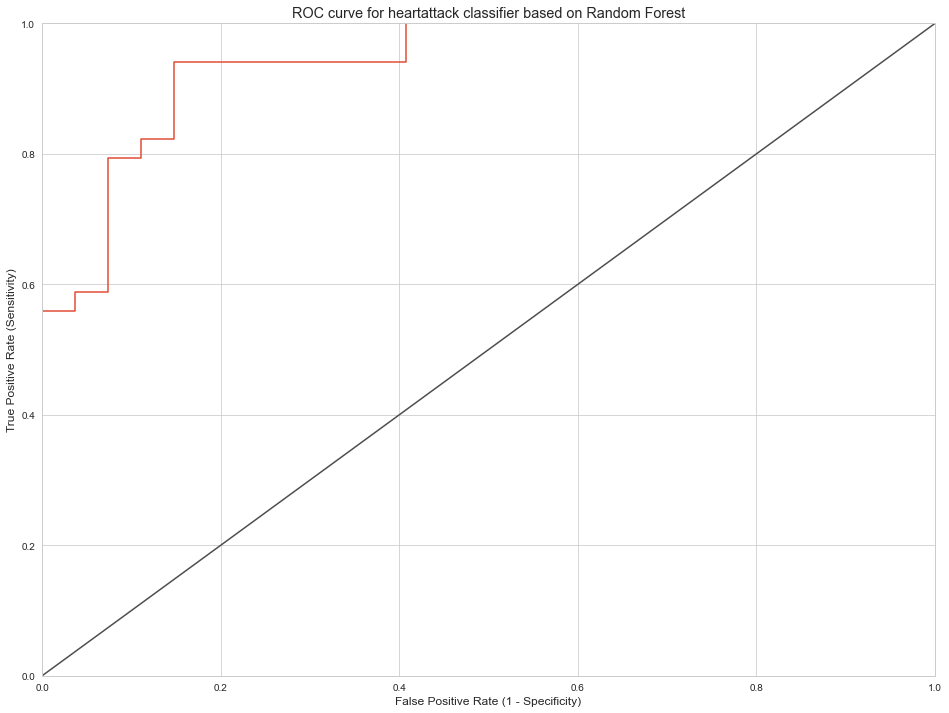

In [50]:
#绘制ROC曲线
from sklearn.metrics import roc_curve 
y_pred=rf_best.predict_proba(x_test.T)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(15,6))
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for heartattack classifier based on Random Forest', fontweight=13) 
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)') 
plt.savefig('./ROC_curve.png')

AUC（Area Under Curve）被定义为ROC曲线下与坐标轴围成的面积，因此这个面积的数值不会大于1。
又因为ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围在[0.5,1.0]。AUC越接近1.0，构建模型将T分类为T，F分类为F的能力就越强;等于0.5时，则没有实际的应用价值即分类能力最弱。

In [51]:
#计算AUC Score
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.9389978213507625
